In [1]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [101]:
batch_1 = unpickle('./cifar10/cifar-10-batches-py/data_batch_1')
batch_2 = unpickle('./cifar10/cifar-10-batches-py/data_batch_2')
batch_3 = unpickle('./cifar10/cifar-10-batches-py/data_batch_3')
batch_4 = unpickle('./cifar10/cifar-10-batches-py/data_batch_4')
batch_5 = unpickle('./cifar10/cifar-10-batches-py/data_batch_5')
test_batch = unpickle('./cifar10/cifar-10-batches-py/test_batch')

In [148]:
meta = unpickle('./cifar10/cifar-10-batches-py/batches.meta')

In [154]:
names = meta[b'label_names']
for i in range(len(names)):
    names[i] = str(names[i], 'utf-8')

In [182]:
nomes = ['avião',
         'automóvel',
         'pássaro',
         'gato',
         'cervo',
         'cachorro',
         'sapo',
         'cavalo',
         'navio',
         'caminhão']

In [109]:
img_df = None
img_df = np.append(batch_1[b"data"],
                   batch_2[b"data"],
                   axis=0)
img_df = np.append(img_df,
                   batch_3[b"data"],
                   axis=0)
img_df = np.append(img_df,
                   batch_4[b"data"],
                   axis=0)
img_df = np.append(img_df,
                   batch_5[b"data"],
                   axis=0)

In [110]:
y = None
y = np.append(batch_1[b"labels"],
                batch_2[b"labels"],
                axis=0)
y = np.append(y,
                batch_3[b"labels"],
                axis=0)
y = np.append(y,
                batch_4[b"labels"],
                axis=0)
y = np.append(y,
                batch_5[b"labels"],
                axis=0)

In [112]:
y.shape

(50000,)

In [122]:
img_test = test_batch[b"data"]

In [123]:
y_test = test_batch[b"labels"]

In [12]:
def convolutional_model(input_shape):
    """
    Modelo:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> DENSE
    
    Arguments:
    input_img -- input dataset, of shape (input_shape)

    Returns:
    model -- TF Keras model (object containing the information for the entire training process) 
    """

    input_img = tf.keras.Input(shape=input_shape)
    ## CONV2D: 8 filters 4x4, stride of 1, padding 'SAME'
    Z1 = tf.keras.layers.Conv2D(
    8, 4, strides=(1, 1), padding='same',
    data_format=None, dilation_rate=(1, 1), groups=1, activation=None,
    use_bias=True, kernel_initializer='glorot_uniform',
    bias_initializer='zeros', kernel_regularizer=None,
    bias_regularizer=None, activity_regularizer=None, kernel_constraint=None,
    bias_constraint=None)(input_img)
    ## RELU
    A1 = tf.keras.layers.ReLU(
    max_value=None, negative_slope=0, threshold=0)(Z1)
    ## MAXPOOL: window 8x8, stride 8, padding 'SAME'
    P1 = tf.keras.layers.MaxPool2D(
    pool_size=(8,8), strides=8, padding='same', data_format=None)(A1)
    ## CONV2D: 16 filters 2x2, stride 1, padding 'SAME'
    Z2 = tf.keras.layers.Conv2D(
    16, 2, strides=(1, 1), padding='same',
    data_format=None, dilation_rate=(1, 1), groups=1, activation=None,
    use_bias=True, kernel_initializer='glorot_uniform',
    bias_initializer='zeros', kernel_regularizer=None,
    bias_regularizer=None, activity_regularizer=None, kernel_constraint=None,
    bias_constraint=None)(P1)
    ## RELU
    A2 = tf.keras.layers.ReLU(
    max_value=None, negative_slope=0, threshold=0)(Z2)
    ## MAXPOOL: window 4x4, stride 4, padding 'SAME'
    P2 = tf.keras.layers.MaxPool2D(
    pool_size=(4,4), strides=4, padding='same', data_format=None)(A2)
    ## FLATTEN
    F = tf.keras.layers.Flatten()(P2)
    ## Dense layer
    ## 10 neurons in output layer.
    outputs = tf.keras.layers.Dense(
    10, activation="softmax", use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros', kernel_regularizer=None,
    bias_regularizer=None, activity_regularizer=None, kernel_constraint=None,
    bias_constraint=None)(F)
    # YOUR CODE STARTS HERE
    
    
    # YOUR CODE ENDS HERE
    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

In [17]:
import tensorflow as tf

img_df

array([[ 59,  43,  50, ..., 140,  84,  72],
       [154, 126, 105, ..., 139, 142, 144],
       [255, 253, 253, ...,  83,  83,  84],
       ...,
       [ 71,  60,  74, ...,  68,  69,  68],
       [250, 254, 211, ..., 215, 255, 254],
       [ 62,  61,  60, ..., 130, 130, 131]], dtype=uint8)

In [114]:
img_df2 = img_df.reshape((50000,3,32,32))
img_df2 = img_df2.transpose(0,2,3,1).astype("uint8")

In [125]:
img_test = img_test.reshape((10000,3,32,32))
img_test = img_test.transpose(0,2,3,1).astype("uint8")

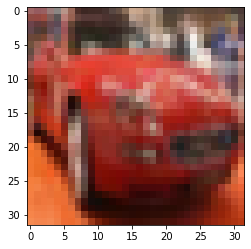

In [115]:
import matplotlib.pyplot as plt
plt.imshow(img_df2[5])

In [131]:
model = convolutional_model((32,32,3))

In [117]:
img_df2 = img_df2 / 255

In [126]:
img_test = img_test/255

In [132]:
model.compile(optimizer = tf.keras.optimizers.Adam(lr=1e-5),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_40 (Conv2D)          (None, 32, 32, 8)         392       
                                                                 
 re_lu_4 (ReLU)              (None, 32, 32, 8)         0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 8)          0         
 2D)                                                             
                                                                 
 conv2d_41 (Conv2D)          (None, 4, 4, 16)          528       
                                                                 
 re_lu_5 (ReLU)              (None, 4, 4, 16)          0         
                                                           

C:\Users\matheus.sartor\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [120]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)
Y_train = enc.fit_transform(np.array(y).reshape(50000,-1))

In [128]:
Y_test = enc.fit_transform(np.array(y_test).reshape(10000,-1))

In [80]:
train_dataset = tf.data.Dataset.from_tensor_slices((img_df2, Y_train))

In [133]:
history = model.fit(img_df2,Y_train,validation_data=(img_test,Y_test), epochs=20)

Epoch 1/20
1563/1563 [==============================] - 14s 8ms/step - loss: 2.3036 - accuracy: 0.0987 - val_loss: 2.2993 - val_accuracy: 0.1054
Epoch 2/20
1563/1563 [==============================] - 17s 11ms/step - loss: 2.2965 - accuracy: 0.1160 - val_loss: 2.2947 - val_accuracy: 0.1248
Epoch 3/20
1563/1563 [==============================] - 16s 10ms/step - loss: 2.2924 - accuracy: 0.1315 - val_loss: 2.2908 - val_accuracy: 0.1378
Epoch 4/20
1563/1563 [==============================] - 14s 9ms/step - loss: 2.2886 - accuracy: 0.1451 - val_loss: 2.2868 - val_accuracy: 0.1488
Epoch 5/20
1563/1563 [==============================] - 18s 12ms/step - loss: 2.2844 - accuracy: 0.1591 - val_loss: 2.2822 - val_accuracy: 0.1617
Epoch 6/20
1563/1563 [==============================] - 16s 10ms/step - loss: 2.2796 - accuracy: 0.1701 - val_loss: 2.2772 - val_accuracy: 0.1762
Epoch 7/20
1563/1563 [==============================] - 15s 10ms/step - loss: 2.2744 - accuracy: 0.1798 - val_loss: 2.2718 - v

In [134]:
predictions = model.predict(img_test)

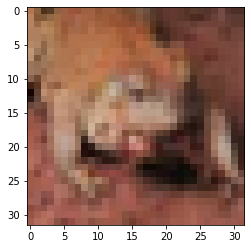

In [135]:
plt.imshow(img_test[5])

In [156]:
print(names[np.argmax(predictions[5])])

ship


Modelo bosta... kkkkkk!

#### Modelo ResNet-34

In [157]:
def identity_block(x, filter):
    # copy tensor to variable called x_skip
    x_skip = x
    # Layer 1
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    x = tf.keras.layers.Activation('relu')(x)
    # Layer 2
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    # Add Residue
    x = tf.keras.layers.Add()([x, x_skip])     
    x = tf.keras.layers.Activation('relu')(x)
    return x

def convolutional_block(x, filter):
    # copy tensor to variable called x_skip
    x_skip = x
    # Layer 1
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same', strides = (2,2))(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    x = tf.keras.layers.Activation('relu')(x)
    # Layer 2
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    # Processing Residue with conv(1,1)
    x_skip = tf.keras.layers.Conv2D(filter, (1,1), strides = (2,2))(x_skip)
    # Add Residue
    x = tf.keras.layers.Add()([x, x_skip])     
    x = tf.keras.layers.Activation('relu')(x)
    return x

def ResNet34(shape = (32, 32, 3), classes = 10):
    # Step 1 (Setup Input Layer)
    x_input = tf.keras.layers.Input(shape)
    x = tf.keras.layers.ZeroPadding2D((3, 3))(x_input)
    # Step 2 (Initial Conv layer along with maxPool)
    x = tf.keras.layers.Conv2D(64, kernel_size=7, strides=2, padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.MaxPool2D(pool_size=3, strides=2, padding='same')(x)
    # Define size of sub-blocks and initial filter size
    block_layers = [3, 4, 6, 3]
    filter_size = 64
    # Step 3 Add the Resnet Blocks
    for i in range(4):
        if i == 0:
            # For sub-block 1 Residual/Convolutional block not needed
            for j in range(block_layers[i]):
                x = identity_block(x, filter_size)
        else:
            # One Residual/Convolutional Block followed by Identity blocks
            # The filter size will go on increasing by a factor of 2
            filter_size = filter_size*2
            x = convolutional_block(x, filter_size)
            for j in range(block_layers[i] - 1):
                x = identity_block(x, filter_size)
    # Step 4 End Dense Network
    x = tf.keras.layers.AveragePooling2D((2,2), padding = 'same')(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(512, activation = 'relu')(x)
    x = tf.keras.layers.Dense(classes, activation = 'softmax')(x)
    model = tf.keras.models.Model(inputs = x_input, outputs = x, name = "ResNet34")
    return model

In [161]:
modelo_resnet = ResNet34()

In [162]:
modelo_resnet.compile(optimizer = tf.keras.optimizers.Adam(lr=1e-5),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
modelo_resnet.summary()

Model: "ResNet34"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 zero_padding2d_2 (ZeroPadding2  (None, 38, 38, 3)   0           ['input_6[0][0]']                
 D)                                                                                               
                                                                                                  
 conv2d_78 (Conv2D)             (None, 19, 19, 64)   9472        ['zero_padding2d_2[0][0]']       
                                                                                                  
 batch_normalization_66 (BatchN  (None, 19, 19, 64)  256         ['conv2d_78[0][0]']       

In [163]:
history = modelo_resnet.fit(img_df2, Y_train, validation_data=(img_test,Y_test),epochs=10)

Epoch 1/10
1563/1563 [==============================] - 2432s 2s/step - loss: 1.6748 - accuracy: 0.3969 - val_loss: 1.4570 - val_accuracy: 0.4724
Epoch 2/10
1563/1563 [==============================] - 2451s 2s/step - loss: 1.3404 - accuracy: 0.5204 - val_loss: 1.4523 - val_accuracy: 0.4829
Epoch 3/10
1563/1563 [==============================] - 2435s 2s/step - loss: 1.1483 - accuracy: 0.5913 - val_loss: 1.3549 - val_accuracy: 0.5217
Epoch 4/10
1563/1563 [==============================] - 2394s 2s/step - loss: 0.9756 - accuracy: 0.6570 - val_loss: 1.3511 - val_accuracy: 0.5286
Epoch 5/10
1563/1563 [==============================] - 2351s 2s/step - loss: 0.7996 - accuracy: 0.7193 - val_loss: 1.4645 - val_accuracy: 0.5182
Epoch 6/10
1563/1563 [==============================] - 2404s 2s/step - loss: 0.6285 - accuracy: 0.7813 - val_loss: 1.5863 - val_accuracy: 0.5195
Epoch 7/10
1563/1563 [==============================] - 2407s 2s/step - loss: 0.4786 - accuracy: 0.8332 - val_loss: 1.6261 -

In [165]:
modelo_resnet.save('modeloResNet34')

INFO:tensorflow:Assets written to: modeloResNet34\assets


C:\Users\matheus.sartor\Anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
C:\Users\matheus.sartor\Anaconda3\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


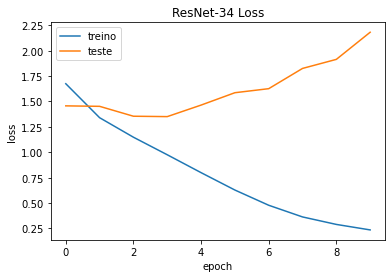

In [166]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('ResNet-34 Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['treino', 'teste'], loc='upper left')
plt.show()

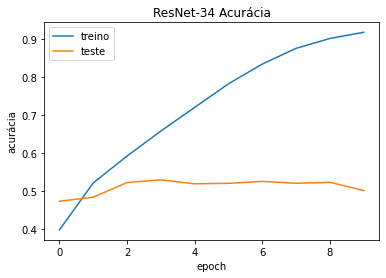

In [167]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('ResNet-34 Acurácia')
plt.ylabel('acurácia')
plt.xlabel('epoch')
plt.legend(['treino', 'teste'], loc='upper left')
plt.show()

In [168]:
predictions = modelo_resnet.predict(img_test)

In [172]:
pred = []
for i in range(len(predictions)):
    pred.append(np.argmax(predictions[i]))

In [175]:
from sklearn.metrics import accuracy_score

accuracy_score(pred,y_test)

0.5004

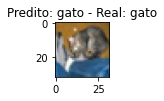

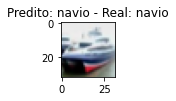

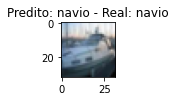

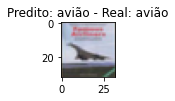

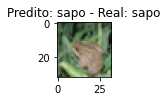

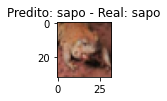

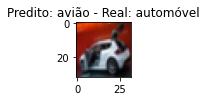

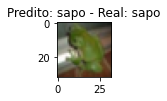

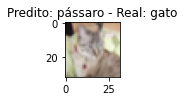

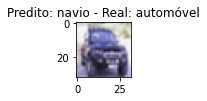

In [183]:
for i in range(10):
    plt.figure(figsize = (1,1))
    plt.imshow(img_test[i])
    plt.title(f'Predito: {nomes[pred[i]]} - Real: {nomes[y_test[i]]}')

In [184]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(pred, y_test)
confusion_matrix = confusion_matrix.astype(int)

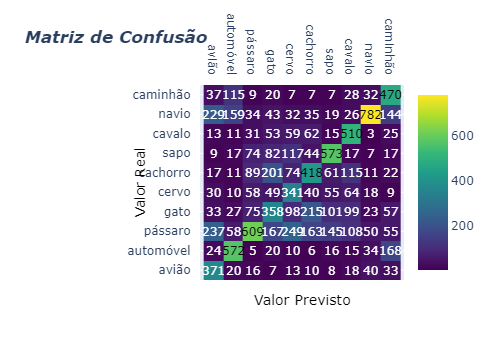

In [186]:
import plotly.figure_factory as ff
def plot_confusion_matrix(z):
    x = nomes
    y =  nomes

    # change each element of z to type string for annotations
    z_text = [[str(y) for y in x] for x in z]

    # set up figure 
    fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale='Viridis')

    # add title
    fig.update_layout(title_text='<i><b>Matriz de Confusão</b></i>',
                      #xaxis = dict(title='x'),
                      #yaxis = dict(title='x')
                     )

    # add custom xaxis title
    fig.add_annotation(dict(font=dict(color="black",size=14),
                            x=0.5,
                            y=-0.15,
                            showarrow=False,
                            text="Valor Previsto",
                            xref="paper",
                            yref="paper"))

    # add custom yaxis title
    fig.add_annotation(dict(font=dict(color="black",size=14),
                            x=-0.35,
                            y=0.5,
                            showarrow=False,
                            text="Valor Real",
                            textangle=-90,
                            xref="paper",
                            yref="paper"))

    # adjust margins to make room for yaxis title
    fig.update_layout(margin=dict(t=50, l=200))

    # add colorbar
    fig['data'][0]['showscale'] = True
    fig.show()
plot_confusion_matrix(confusion_matrix)

#### Por via das duvidas, quero ver como fica a matriz de confusão com os dados de treino

In [188]:
train_predictions = modelo_resnet.predict(img_df2)

In [189]:
train_pred = []
for i in range(len(train_predictions)):
    train_pred.append(np.argmax(train_predictions[i]))

accuracy_score(train_pred,y)

0.938

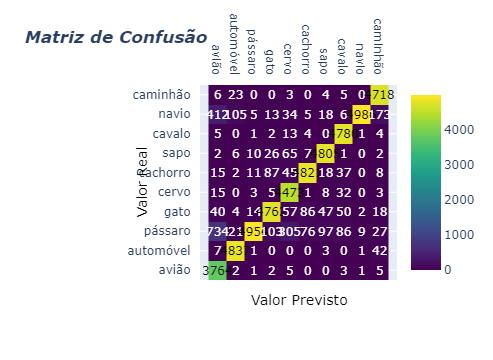

In [190]:
confusion_matrix = metrics.confusion_matrix(train_pred, y)
confusion_matrix = confusion_matrix.astype(int)
plot_confusion_matrix(confusion_matrix)